In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from plotnine import *

In [2]:
d = pd.read_csv('rank_runs_summary.csv')

d

,example_name,estimate_name,SpearmanR_all,SpearmanR_test,pick_auc,mean pick KL divergence,training lists,test lists,data_size,test_size,run_i,rand_seed
0,uci wine example,Stan inspection model,0.390832,0.384316,0.542778,inf,200,200,6497,5564,0,682143856
1,uci wine example,Stan utility model,0.426797,0.418672,0.825772,0.345381,200,200,6497,5564,0,682143856
2,uci wine example,logistic differences,0.404917,0.396997,0.826684,0.416967,200,200,6497,5564,0,682143856
3,uci wine example,"logistic items (posn=T, stop=T)",0.432452,0.424806,0.466569,0.468684,200,200,6497,5564,0,682143856
4,uci wine example,"logistic items (posn=T, stop=F)",0.428542,0.420334,0.830850,0.408020,200,200,6497,5564,0,682143856
...,...,...,...,...,...,...,...,...,...,...,...,...
395,uci wine example,"logistic items (posn=T, stop=T)",0.438514,0.432533,0.496869,0.467978,200,200,6497,5574,49,1733410116
396,uci wine example,"logistic items (posn=T, stop=F)",0.429402,0.422459,0.842678,0.407068,200,200,6497,5574,49,1733410116
397,uci wine example,"logistic items (posn=F, stop=T)",0.435250,0.429568,0.594081,0.457880,200,200,6497,5574,49,1733410116
398,uci wine example,"logistic items (posn=F, stop=F)",0.389168,0.383224,0.584313,0.461018,200,200,6497,5574,49,1733410116


In [3]:
n_draws = int(np.max(d['run_i']) + 1)
n_lists = int(np.mean(d['training lists']))

In [4]:
d_SpearmanR = d.loc[:, ['estimate_name', 'SpearmanR_test']].reset_index(drop=True, inplace=False)
d_SpearmanR['is_comparison_model'] = [
    not nm.startswith('logistic items') for nm in d_SpearmanR['estimate_name']]
ideal_score = d_SpearmanR.loc[d_SpearmanR['estimate_name'] == 'observed score', 'SpearmanR_test'].mean()
d_SpearmanR = d_SpearmanR.loc[d_SpearmanR['estimate_name'] != 'observed score', :]

d_SpearmanR

,estimate_name,SpearmanR_test,is_comparison_model
0,Stan inspection model,0.384316,True
1,Stan utility model,0.418672,True
2,logistic differences,0.396997,True
3,"logistic items (posn=T, stop=T)",0.424806,False
4,"logistic items (posn=T, stop=F)",0.420334,False
...,...,...,...
394,logistic differences,0.437622,True
395,"logistic items (posn=T, stop=T)",0.432533,False
396,"logistic items (posn=T, stop=F)",0.422459,False
397,"logistic items (posn=F, stop=T)",0.429568,False


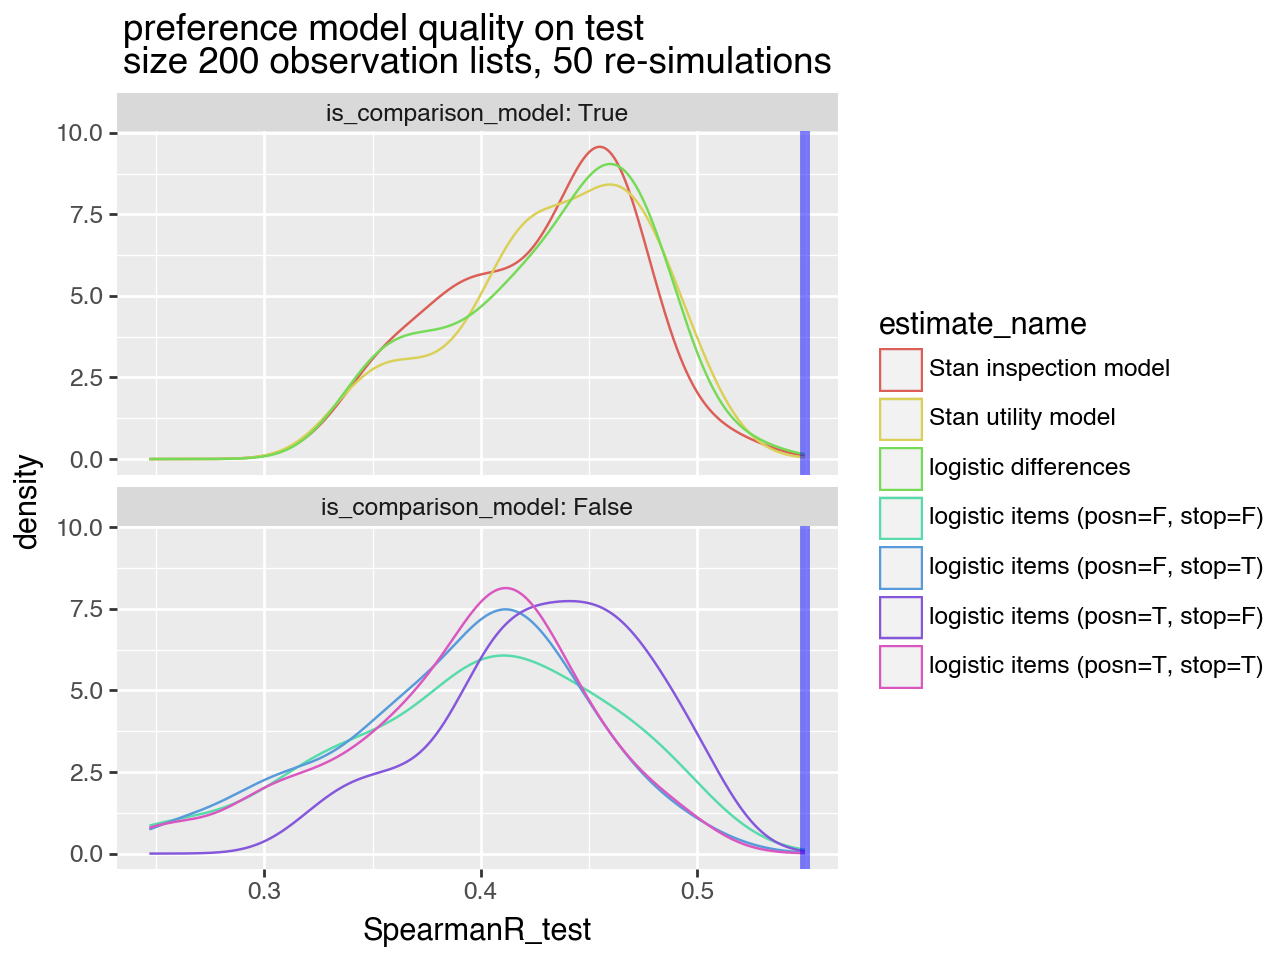

In [5]:
(
    ggplot(
        data=d_SpearmanR,
        mapping=aes(
            x='SpearmanR_test',
            color='estimate_name',
        )
    )
    + facet_wrap(
        'is_comparison_model', 
        ncol=1, 
        labeller='label_both',
        as_table=False,
        )
    + geom_density()
    + geom_vline(xintercept=ideal_score, color='blue', alpha=0.5, size=2)
    + ggtitle(f"preference model quality on test\nsize {n_lists} observation lists, {n_draws} re-simulations")
)